In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/competitions/aptos2019-blindness-detection/data")

100%|██████████| 9.51G/9.51G [04:51<00:00, 35.1MB/s]



Extracting archive ./aptos2019-blindness-detection/aptos2019-blindness-detection.zip to ./aptos2019-blindness-detection


In [ ]:
pip install keras_utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras_utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2632 sha256=c5d9b587ceb57c18164154825746e1640a1ab48b02972ebe1f80cf3f3899d7d2
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras_utils


In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
from zipfile import ZipFile
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import img_to_array
import keras_utils as np_utils
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

In [ ]:
dataset = []
labels = []

In [ ]:
train_Data = pd.read_csv("aptos2019-blindness-detection/train.csv")
train_Data.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [ ]:
id_code_Data = train_Data['id_code']
diagnosis_Data = train_Data['diagnosis']

In [ ]:
def prepare_Images(label,path):
    img=cv2.imread(path,cv2.IMREAD_COLOR)
    img_res=cv2.resize(img,(224,224))
    img_array = img_to_array(img_res)
    img_array = img_array/255.0
    dataset.append(img_array)
    labels.append(str(label))

In [ ]:
for id_code,diagnosis in tqdm(zip(id_code_Data,diagnosis_Data)):
    path = os.path.join('aptos2019-blindness-detection/train_images','{}.png'.format(id_code))
    prepare_Images(diagnosis,path)

3662it [07:52,  7.75it/s]


In [ ]:
images = np.array(dataset)
label_arr = np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(images,label_arr,stratify=label_arr,test_size=0.20,random_state=44)

In [ ]:
x_train.shape

(2929, 224, 224, 3)

In [ ]:
x_test.shape

(733, 224, 224, 3)

In [ ]:
y_train.shape

(2929,)

In [ ]:
y_test.shape

(733,)

In [ ]:
pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=bbe7e0eec79850fbc8ba6a72a172e7ce3aa53141055c108a3e933e034e2c7f74
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
from keras.utils import to_categorical

In [ ]:
y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)

In [ ]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(5,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

In [ ]:
import tensorflow
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=64,epochs=30,verbose=1)

Epoch 1/30
46/46 [==============================] - 125s 3s/step - loss: 0.9786 - accuracy: 0.6501
Epoch 2/30
46/46 [==============================] - 121s 3s/step - loss: 0.7756 - accuracy: 0.7245
Epoch 3/30
46/46 [==============================] - 120s 3s/step - loss: 0.7389 - accuracy: 0.7299
Epoch 4/30
46/46 [==============================] - 120s 3s/step - loss: 0.7150 - accuracy: 0.7395
Epoch 5/30
46/46 [==============================] - 125s 3s/step - loss: 0.6895 - accuracy: 0.7463
Epoch 6/30
46/46 [==============================] - 123s 3s/step - loss: 0.6660 - accuracy: 0.7480
Epoch 7/30
46/46 [==============================] - 122s 3s/step - loss: 0.6520 - accuracy: 0.7538
Epoch 8/30
46/46 [==============================] - 121s 3s/step - loss: 0.6148 - accuracy: 0.7764
Epoch 9/30
46/46 [==============================] - 122s 3s/step - loss: 0.5859 - accuracy: 0.7832
Epoch 10/30
46/46 [==============================] - 121s 3s/step - loss: 0.5426 - accuracy: 0.7948
Epoch 11/

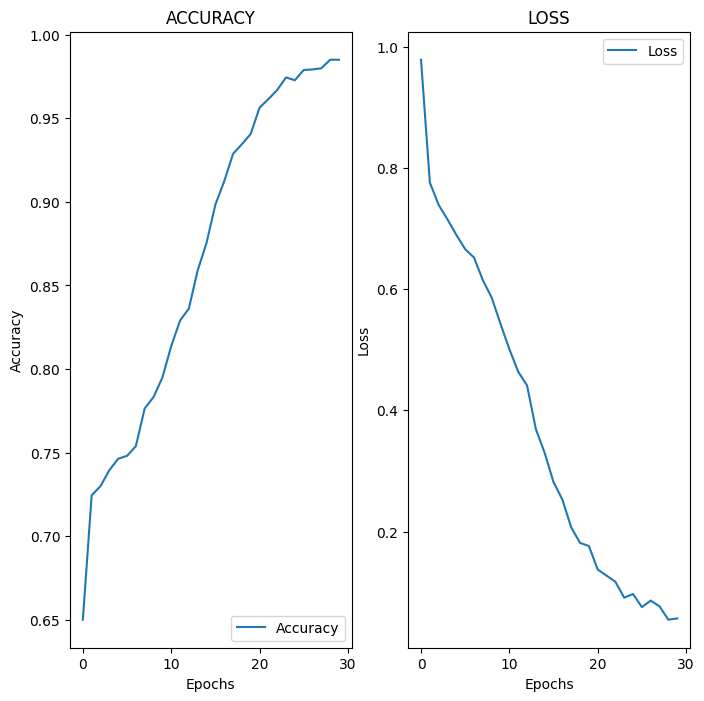

In [ ]:
import matplotlib.pyplot as plt
acc = model.history.history['accuracy']

loss = model.history.history['loss']
EPOCHS = 30

epochs_range = range(EPOCHS)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Accuracy')
plt.legend(loc='lower right')
plt.title('ACCURACY')
plt.ylabel("Accuracy")
plt.xlabel("Epochs")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Loss')
plt.legend(loc='upper right')
plt.title('LOSS')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('/content/drive/MyDrive/retinopathy.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
conMat = confusion_matrix(y_test.argmax(axis=1),pred.argmax(axis=1))
print(conMat)

[[343   8   9   1   0]
 [  9  27  26   3   9]
 [  7  17 139  18  19]
 [  1   2  14  17   5]
 [  0   6  22   5  26]]


Confusion matrix, without normalization
[[343   8   9   1   0]
 [  9  27  26   3   9]
 [  7  17 139  18  19]
 [  1   2  14  17   5]
 [  0   6  22   5  26]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

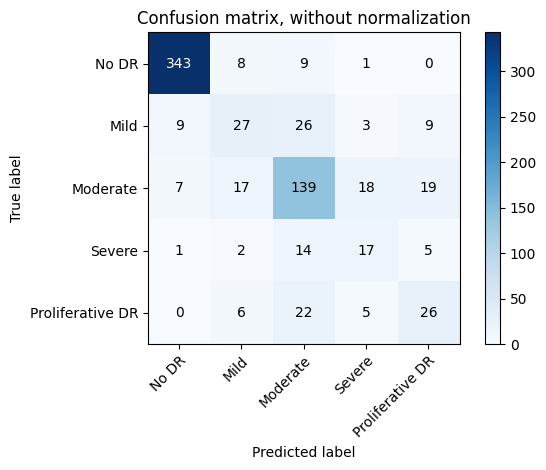

In [ ]:
Y_val_actual_hot = y_test.argmax(axis = 1)
Y_val_pred_hot = pred.argmax(axis = 1)
class_labels=["No DR", "Mild", "Moderate", "Severe", "Proliferative DR"]
plot_confusion_matrix(Y_val_actual_hot, Y_val_pred_hot, np.array(class_labels))

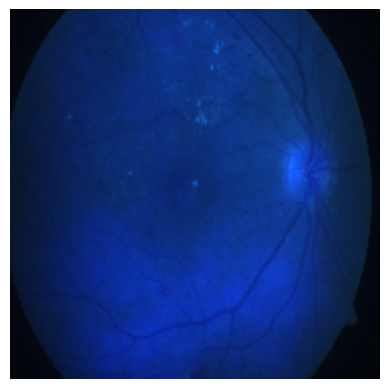

In [ ]:
plt.axis('off')
plt.imshow(x_train[0])

In [ ]:
from keras.models import load_model
import numpy as np

loaded_handmade_model = load_model('/content/drive/MyDrive/retinopathy.h5')

d = {0 : 'NoDR', 1 : 'Mild', 2 : 'Moderate', 3 : 'Severe', 4 : 'Proliferative'}

In [ ]:
import cv2
import tensorflow as tf

In [ ]:
def predict_class(path, model):
    IMG_SIZE_LOAD = 224
    xtest = np.zeros((1, 224, 224, 3))
    image = cv2.imread(path)
    image = cv2.resize(image, (IMG_SIZE_LOAD, IMG_SIZE_LOAD))
    x_test_array = tf.keras.preprocessing.image.img_to_array(image)
    xtest[0] = x_test_array
    xtest = xtest / 255.0
    preds = model.predict(xtest)
    print(preds)
    l = preds[0]
    ind = np.where(l == max(l))[0][0]
    print(np.where(l == max(l))[0][0])
    print(d[ind])

In [ ]:
from PIL import Image

In [ ]:
path = "./aptos2019-blindness-detection/train_images/00a8624548a9.png"
image = Image.open(path)

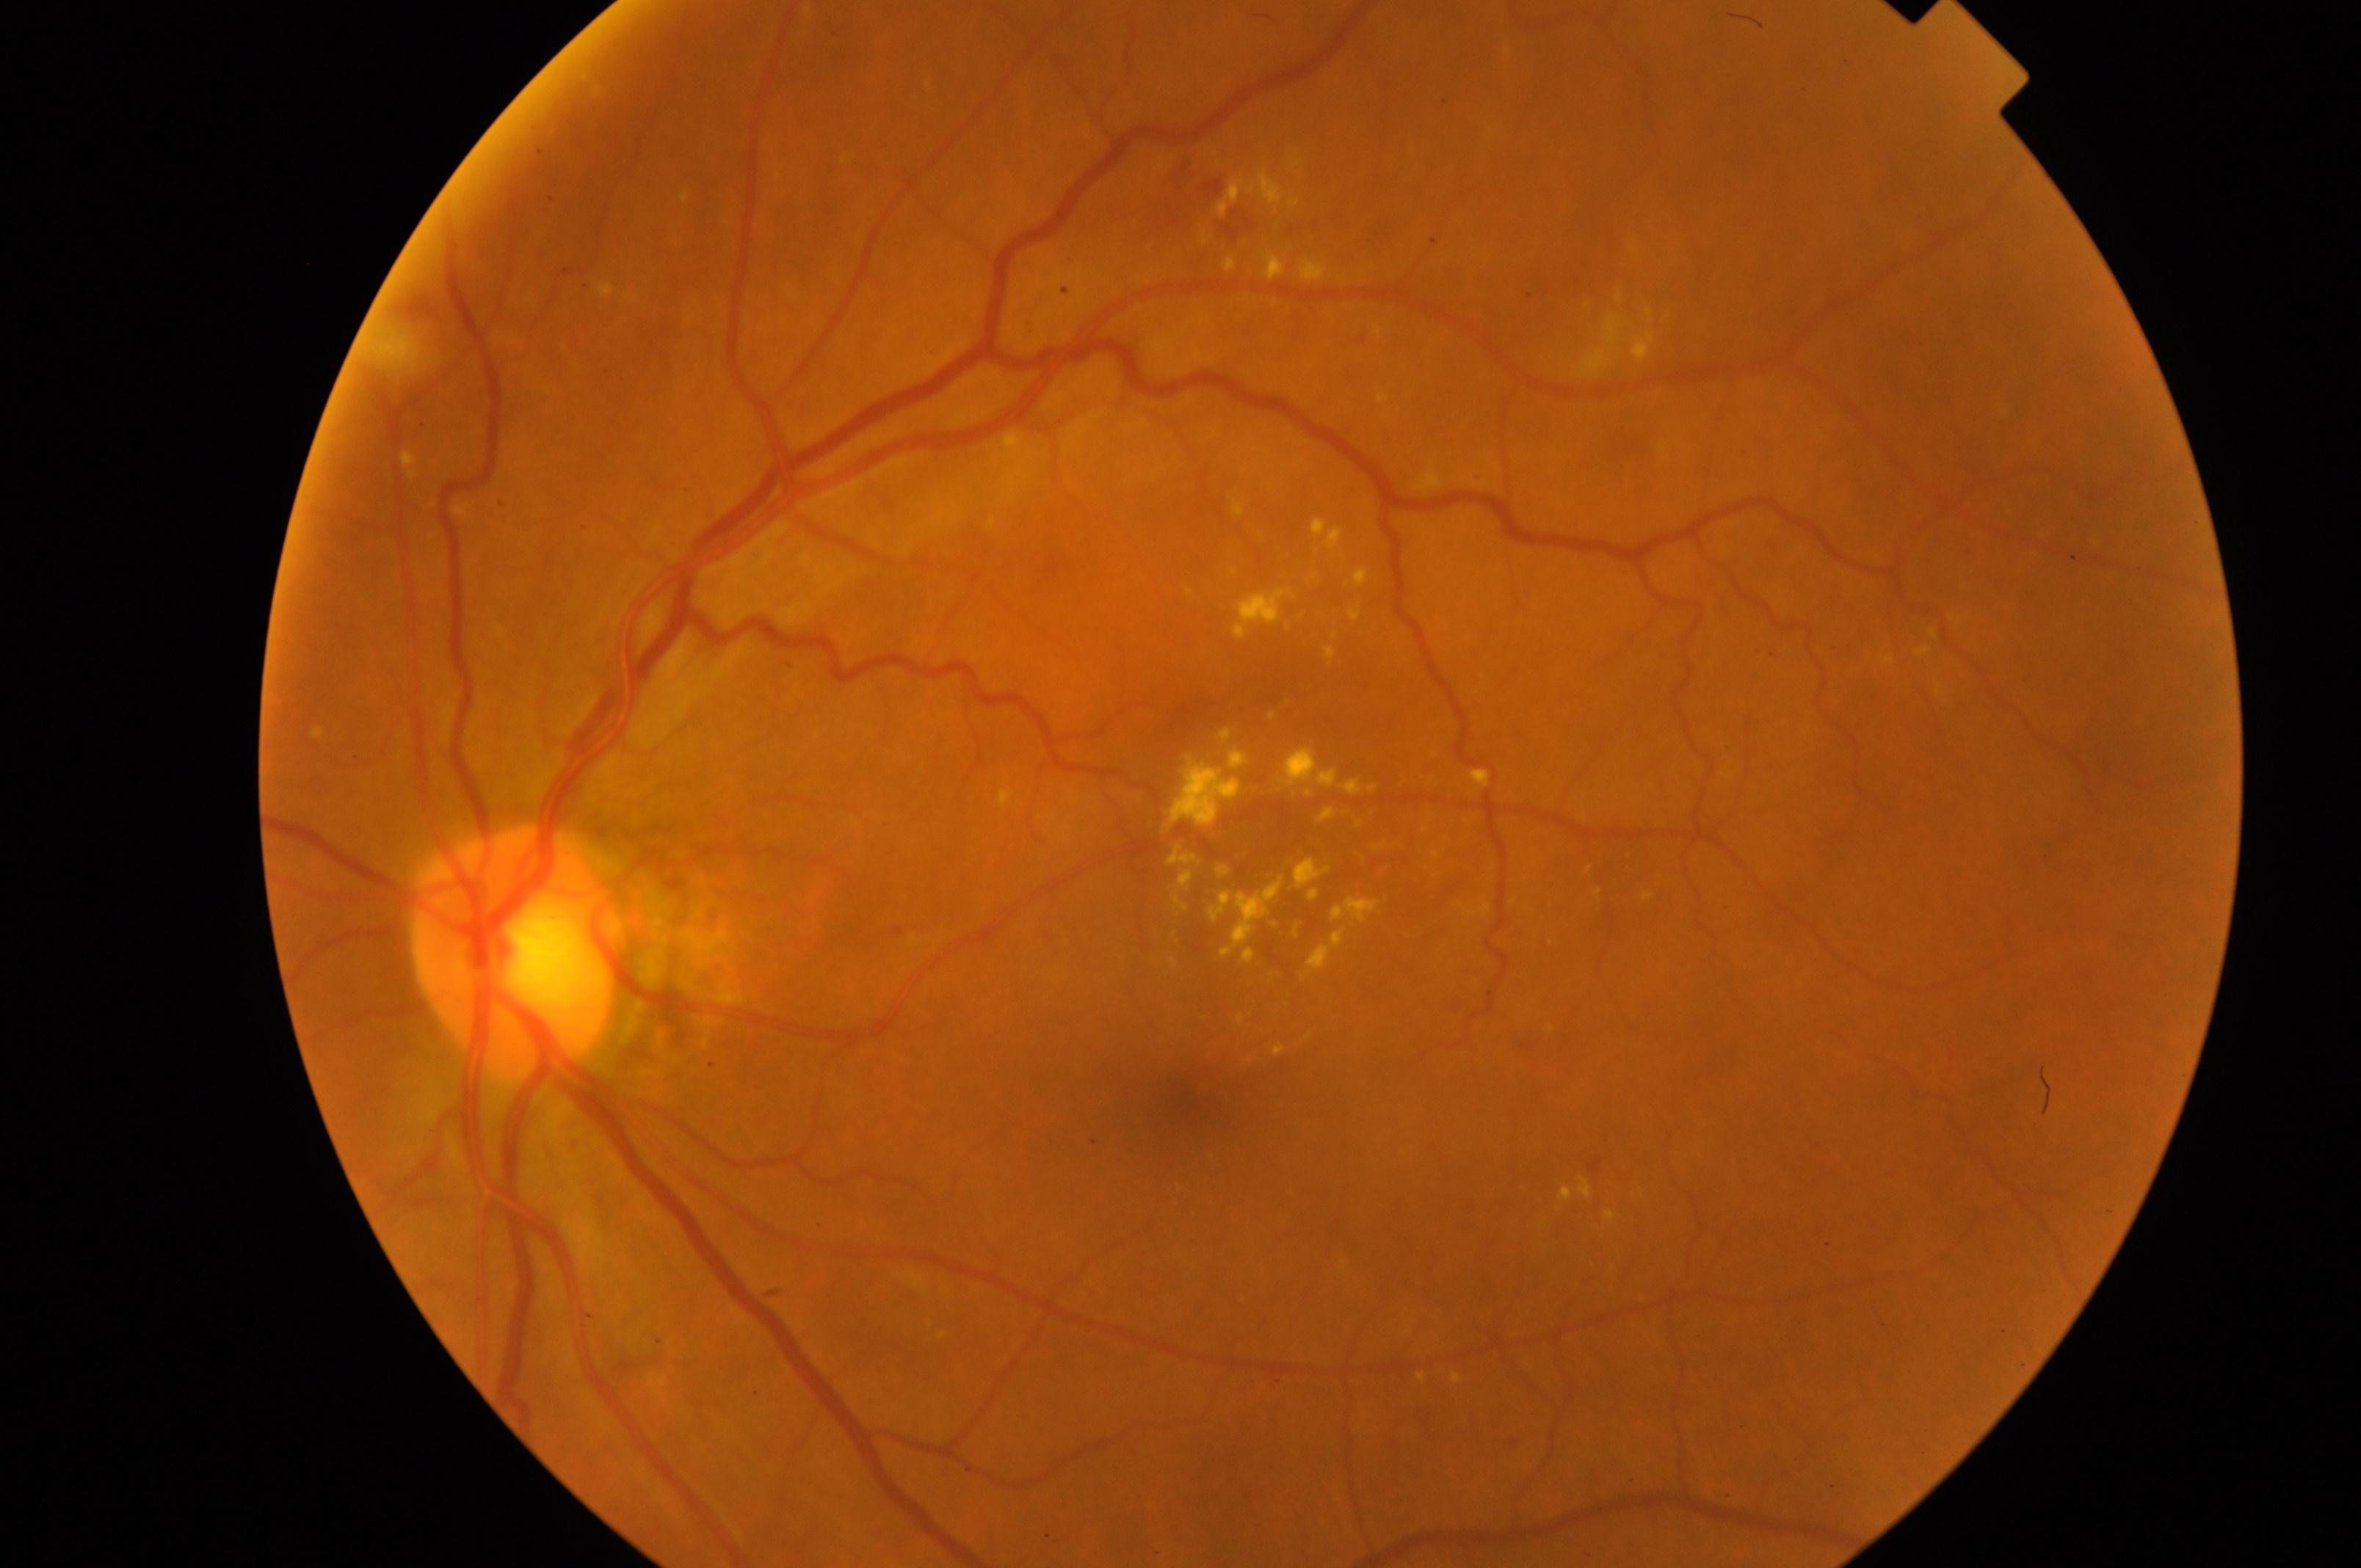

In [ ]:
display(image)

In [ ]:
predict_class(path, loaded_handmade_model)

1/1 [==============================] - 1s 570ms/step
[[5.3714970e-11 4.2265760e-09 9.9999428e-01 4.3382038e-06 1.4366939e-06]]
2
Moderate
